In [1]:
import seaborn
import glob
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FixedLocator

In [8]:
models = [
    "GPT-4\n(direct concat)",
    "GPT-4\n(system message)",
    "GPT-3.5-turbo-1106\n(direct concat)",
    "GPT-3.5-turbo-1106\n(system message)",
    "Llama-2-chat-13b\n(system message)",
    "Llama-2-chat-7b\n(system message)"
]

conflict_pass_rate = [0.115, 0.231, 0.077, 0.115, 0, 0.077]
similar_pass_rate = [0.115, 0.321, 0.25, 0.357, 0.036, 0.143]
case_pass_rate = [0.218, 0.273, 0.218, 0.345, 0.03, 0.182]

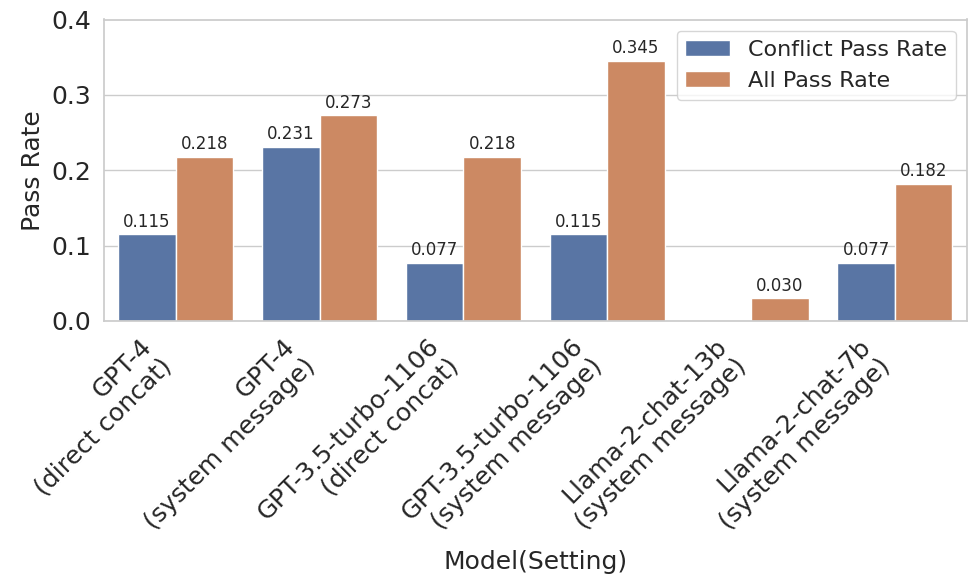

In [9]:
data = {
    'Model': models,
    'Conflict Pass Rate': conflict_pass_rate,
    'All Pass Rate': case_pass_rate
}

df = pd.DataFrame(data)

# Plotting
fig = plt.figure(figsize=(10, 6))

seaborn.set(style="whitegrid")

# Plot
ax = seaborn.barplot(data=df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
ax.set_xticks(range(len(df['Model'])))
ax.set_xticklabels(df['Model'], rotation=45, ha="right")
ax.set_xlabel('Model(Setting)', fontsize=18)
ax.set_ylabel('Pass Rate', fontsize=18)

# Increase font size for the axes and the legend
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

plt.ylim(0, 0.40)

plt.legend(fontsize=16)

# Annotate the bars with the numeric values
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only add text label if the height is greater than 0
        ax.text(p.get_x() + p.get_width() / 2., height + 0.01, '{:1.3f}'.format(height), ha="center", fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
pdf_filename = '../figures/prelimiary_2_in_1_bar.pdf'
fig.savefig(pdf_filename, format='pdf')